In [33]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

dic={"Name":["jhon","jack","angelica","andrew","isac"],"Last Name":["stott","mcbride","newman","hines","justice"],"Age":[10,20,15,15,29],"Role":["AI","AI","WEB","MOBILE","MANAGER"],"Home Adress":["california","caliornia","florida","florida","california"],"Salary":[0,1200,500,500,1400],"Seniority":[0,3,1,2,4]}
data=pd.DataFrame.from_dict(dic)
data

,Name,Last Name,Age,Role,Home Adress,Salary,Seniority
0,jhon,stott,10,AI,california,0,0
1,jack,mcbride,20,AI,caliornia,1200,3
2,angelica,newman,15,WEB,florida,500,1
3,andrew,hines,15,MOBILE,florida,500,2
4,isac,justice,29,MANAGER,california,1400,4


In [34]:
x=data["Age"].values[:,np.newaxis]
y=data["Salary"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE:", mean_squared_error(y_test,predicted))
print("R squared:", metrics.r2_score(y_test,predicted))
print(predicted,y_test)

MSE: 77847.079075479
R squared: -0.24555326520766418
[657.94701987 361.58940397] [500   0]


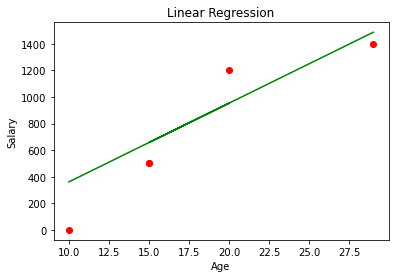

In [35]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.plot(x,model.predict(x),color="g")
plt.show()

In [39]:
x= data[["Age", "Seniority"]]
y= data["Salary"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  418041.38492623414
R squared:  -5.688662158819747


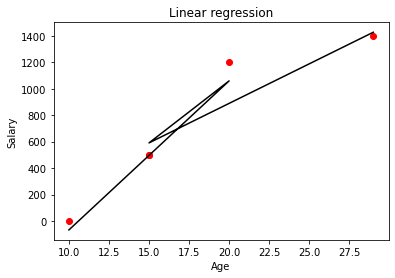

In [41]:
x= data["Age"].values.reshape(-1,1)
y= data["Salary"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 